## Project 2

Scraping Data from Websites

In [294]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import unicodedata
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


_____
### State ranking data

In [234]:
import requests

url = 'https://wallethub.com/edu/states-with-the-best-schools/5335/'

response = requests.get(url)

In [235]:
page = response.text

In [236]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page,"lxml")

In [238]:
rank_dict = {}

for i in range(51):
    rank = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[5*i].text
    state = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[1+5*i].text
    state = state.replace(' ','')
    score = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[2+5*i].text
    quality = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[3+5*i].text
    safety = soup.find(class_='cardhub-edu-table center-aligned sortable').find_all('td')[4+5*i].text
    rank_dict[rank] = [state,float(score),int(quality),int(safety)]

In [239]:
df_rank = pd.DataFrame.from_dict(rank_dict, orient='index', dtype=None)
df_rank.rename(index=str, columns={0: 'State', 1: 'Overall_score',2:'Quality_score', 
                                   3:'Safety_score'}, inplace = True)

##### State Rank data frame

In [240]:
df_rank.sample(10)

,State,Overall_score,Quality_score,Safety_score
4,Wisconsin,64.25,6,7
27,Kentucky,51.58,13,41
40,Nevada,40.99,45,34
1,Massachusetts,78.16,1,1
47,Mississippi,35.99,49,45
44,Alabama,39.06,42,46
46,Arkansas,37.97,32,50
51,Louisiana,27.42,44,51
22,Indiana,54.00,14,27
31,Missouri,50.94,25,36


____
### State budget data

In [197]:
url = 'https://en.wikipedia.org/wiki/List_of_U.S._state_budgets'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page,"lxml")

In [198]:
budget_dict = {}

for i in range(50):
    state = soup.find(class_='mw-parser-output').find_all('td')[6*i].text
    state = state.replace(' ','')
    
    budget = soup.find(class_='mw-parser-output').find_all('td')[1+6*i].text
    budget = float(budget)
    
    fy = soup.find(class_='mw-parser-output').find_all('td')[2+6*i].text
    loc = fy.find('–')
    if fy.find('–') != -1:
        front = int(fy[:loc])
        back = int('20' + fy[loc+1:])
        years = back - front + 1
    else: 
        back = int(fy)
        years = 1
    
    budget_per_capita = soup.find(class_='mw-parser-output').find_all('td')[4+6*i].text
    budget_per_capita = int(budget_per_capita.replace(',',''))
    
    credit_rating = soup.find(class_='mw-parser-output').find_all('td')[5+6*i].text
    
    budget_dict[state] = [budget,back,years,budget_per_capita,credit_rating]

In [199]:
df_budget = pd.DataFrame.from_dict(budget_dict, orient='index', dtype=None)
df_budget.rename(index=str, columns={0: 'Budget_billion', 1: 'Year_end',2:'No_years', 3:'Per_capita',
                                     4:'Credit_rating'}, inplace = True)

In [200]:
df_budget = df_budget.reset_index(level=0)
df_budget.rename(columns = {'index' : 'State'}, inplace = True)

##### State Budget data drame

In [282]:
df_budget

,State,Budget_billion,Year_end,No_years,Per_capita,Credit_rating
0,Alabama,30.0,2017,1,6009,AA
1,Alaska,7.2,2017,1,9750,AA
2,Arizona,36.6,2017,1,5360,AA
3,Arkansas,28.6,2016,1,9603,AA
4,California,170.9,2017,2,4366,AA-
5,Colorado,27.1,2017,2,4966,AA
6,Connecticut,20.4,2017,1,5681,AA-
7,Delaware,4.1,2017,1,4334,AAA
8,Florida,92.3,2017,1,4553,AAA
9,Georgia,23.7,2017,1,2320,AAA


____
### Teacher salary data

In [204]:
from urllib.request import Request, urlopen

site= "https://articles.niche.com/teacher-salaries-in-america/"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page,'lxml')

In [205]:
salary_dict = {}

for i in range(50):
    state = soup.find(class_='table-wrap ').find_all('td')[3*i].text
    state = state.replace('\n','').replace('State','').replace(' ','')
    
    start_salary = soup.find(class_='table-wrap ').find_all('td')[3*i + 1].text
    start_salary = int(start_salary.replace('\n','').replace('Average Starting Salary','')
                       .replace(',','').replace('$',''))
    
    salary = soup.find(class_='table-wrap ').find_all('td')[3*i + 2].text
    salary = int(salary.replace('\n','').replace('Average Salary','').replace(',','').replace('$',''))
    
    salary_dict[state] = [start_salary, salary]

In [206]:
df_salary = pd.DataFrame.from_dict(salary_dict, orient='index', dtype=None)
df_salary.rename(index=str, columns={0: 'Starting_salary', 1: 'Salary'}, inplace = True)

In [207]:
df_salary = df_salary.reset_index(level=0)
df_salary.rename(columns = {'index' : 'State'}, inplace = True)

##### Teacher Salary data frame

In [209]:
df_salary.sample(10)

,State,Starting_salary,Salary
29,NewHampshire,36845,57253
1,Alaska,46785,68138
7,Delaware,41415,60214
47,Washington,40426,54147
42,Tennessee,36402,48456
35,Ohio,35249,57000
19,Maine,33876,51077
48,WestVirginia,33684,45701
43,Texas,40725,52575
23,Minnesota,37644,57346


___
### Medium Income

In [210]:
url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_by_income'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page,"lxml")

In [211]:
income_dict = {}

for i in range(54):
    rank = soup.find(class_='mw-parser-output').find_all('td')[6+7*i].text
    if rank:
        state = soup.find(class_='mw-parser-output').find_all('td')[7+7*i].text
        state = state.replace(' ','')
        income = soup.find(class_='mw-parser-output').find_all('td')[8+7*i].text
        income = int(income.replace(',','').replace('$',''))
        income_dict[rank] = [state, income]
    

In [212]:
df_income = pd.DataFrame.from_dict(income_dict, orient='index', dtype=None)
df_income.rename(index=str, columns={0: 'State', 1: 'Income'}, inplace = True)

##### Income data frame

In [213]:
df_income.sample(10)

,State,Income
1,Maryland,75847
48,WestVirginia,42019
6,Massachusetts,70628
37,Montana,49509
14,Delaware,61255
39,Oklahoma,48568
32,Georgia,51244
20,Vermont,56990
21,Pennsylvania,55702
8,Virginia,66262


___ 
### Class Size

In [214]:
url = 'https://nces.ed.gov/surveys/sass/tables/sass1112_2013314_t1s_007.asp'
response = requests.get(url)
page = response.text
soup = BeautifulSoup(page,"lxml")

In [222]:
class_size_dict = {}

for i in range(60):
    warning = ''
    state = soup.find('tbody').find_all('th')[2+i].text
    state = state.replace('\r','').replace('\n','').replace(' ','')
    state = state.strip()
    if state: # ignores blank cells
        
        # Primary School
        PS_selfcont = soup.find('tbody').find_all('td')[32+16*i].text
        if PS_selfcont == '‡': PS_selfcont = '0'
        warning = soup.find('tbody').find_all('td')[33+16*i].text
        if warning == '!': PS_selfcont = '0'
        PS_selfcont = float(PS_selfcont)
        
        PS_dep = soup.find('tbody').find_all('td')[34+16*i].text
        if PS_dep == '‡': PS_dep = '0'
        warning = soup.find('tbody').find_all('td')[35+16*i].text
        if warning =='!': PS_dep = '0'
        PS_dep = float(PS_dep)
        
        # Middle School
        MS_selfcont = soup.find('tbody').find_all('td')[36+16*i].text
        if MS_selfcont == '‡': MS_selfcont = '0'
        warning = soup.find('tbody').find_all('td')[37+16*i].text
        if warning == '!': MS_selfcont = '0'
        MS_selfcont = float(MS_selfcont)
        
        MS_dep = soup.find('tbody').find_all('td')[38+16*i].text
        if MS_dep == '‡': MS_dep = '0'
        warning = soup.find('tbody').find_all('td')[39+16*i].text
        if warning == '!': MS_dep = '0'
        MS_dep = float(MS_dep)
        
        # High School
        HS_selfcont = soup.find('tbody').find_all('td')[40+16*i].text
        if HS_selfcont == '‡': HS_selfcont = '0'
        warning = soup.find('tbody').find_all('td')[41+16*i].text
        if warning == '!': HS_selfcont = '0'
        HS_selfcont = float(HS_selfcont)
        
        HS_dep = soup.find('tbody').find_all('td')[42+16*i].text
        if HS_dep == '‡': HS_dep = '0'
        warning = soup.find('tbody').find_all('td')[43+16*i].text
        if warning == '!': HS_dep = '0'
        HS_dep = float(HS_dep)
        
        # Combined Grades
        CG_selfcont = soup.find('tbody').find_all('td')[44+16*i].text
        if CG_selfcont == '‡': CG_selfcont = '0'
        warning = soup.find('tbody').find_all('td')[45+16*i].text
        if warning == '!': CG_selfcont = '0'
        CG_selfcont = float(CG_selfcont)
        
        CG_dep = soup.find('tbody').find_all('td')[46+16*i].text
        if CG_dep == '‡': CG_dep = '0'
        warning = soup.find('tbody').find_all('td')[47+16*i].text
        if warning == '!': CG_dep = '0'
        CG_dep = float(CG_dep)

        class_size_dict[state] = [PS_selfcont, PS_dep, MS_selfcont, MS_dep, HS_selfcont, HS_dep, 
                                  CG_selfcont, CG_dep]

In [223]:
df_class_size = pd.DataFrame.from_dict(class_size_dict, orient='index', dtype=None)
df_class_size.rename(index=str, columns={0: 'Primary_SCC', 1: 'Primary_DI',2:'Middle_SCC',
                                         3:'Middle_DI',4:'High_SCC',5:'High_DI',6:'Combine_SCC',
                                         7:'Combine_DI'}, inplace = True)
df_class_size = df_class_size.reset_index(level=0)
df_class_size.rename(columns = {'index' : 'State'}, inplace = True)

##### Class Size Data Frame

In [387]:
df_class_size.sample(5)

,State,Primary_SCC,Primary_DI,Middle_SCC,Middle_DI,High_SCC,High_DI,Combine_SCC,Combine_DI
50,Wyoming,17.4,0.0,11.9,21.3,8.5,17.8,13.4,12.9
29,NewHampshire,21.2,16.6,0.0,23.5,0.0,19.7,10.9,13.0
10,Georgia,21.2,24.3,14.8,24.4,0.0,25.4,13.7,17.6
5,Colorado,23.3,26.1,16.6,26.1,0.0,27.9,17.3,22.1
37,Oregon,26.7,24.1,29.2,28.8,16.2,28.1,18.2,15.3


____ 

### Education budget, itemized

In [433]:
money = {
      "State": [
        "Utah",
        "Idaho",
        "Arizona",
        "Oklahoma",
        "Mississippi",
        "Nevada",
        "North Carolina",
        "Texas",
        "Tennessee",
        "Florida",
        "South Dakota",
        "Colorado",
        "Alabama",
        "Georgia",
        "Kentucky",
        "Indiana",
        "California",
        "Arkansas",
        "South Carolina",
        "New Mexico",
        "Missouri",
        "Oregon",
        "Kansas",
        "Washington",
        "Iowa",
        "Louisiana",
        "Virginia",
        "U.S. Total",
        "Montana",
        "Michigan",
        "Wisconsin",
        "West Virginia",
        "Ohio",
        "Minnesota",
        "Nebraska",
        "North Dakota",
        "Hawaii",
        "Maine",
        "Illinois",
        "Delaware",
        "Pennsylvania",
        "Maryland",
        "New Hampshire",
        "Rhode Island",
        "Massachusetts",
        "Wyoming",
        "Vermont",
        "Connecticut",
        "New Jersey",
        "Alaska",
        "District of Columbia",
        "New York"],
      "Instruction_Employee_Salaries": [
        "2,562",
        "2,741",
        "2,855",
        "2,883",
        "3,098",
        "3,180",
        "3,609",
        "3,934",
        "3,555",
        "3,214",
        "3,592",
        "3,620",
        "3,359",
        "3,785",
        "3,747",
        "3,516",
        "3,779",
        "3,631",
        "3,737",
        "3,595",
        "4,096",
        "3,350",
        "3,833",
        "3,958",
        "4,508",
        "3,789",
        "4,580",
        "4,378",
        "4,243",
        "3,857",
        "4,310",
        "3,862",
        "4,435",
        "5,085",
        "4,938",
        "5,073",
        "4,711",
        "5,050",
        "4,747",
        "5,374",
        "5,368",
        "5,544",
        "5,673",
        "5,961",
        "6,343",
        "6,094",
        "6,564",
        "6,997",
        "6,888",
        "5,260",
        "8,704",
        "8,712"],
      "Instruction_Employee_Benefits": [
        "1,193",
        "957",
        "889",
        "977",
        "1,049",
        "1,272",
        "1,221",
        "626",
        "1,188",
        "954",
        "1,050",
        "983",
        "1,234",
        "1,389",
        "1,329",
        "1,808",
        "1,288",
        "1,058",
        "1,279",
        "1,249",
        "1,218",
        "1,912",
        "1,202",
        "1,386",
        "1,502",
        "1,832",
        "1,690",
        "1,691",
        "1,321",
        "2,196",
        "1,877",
        "1,991",
        "1,617",
        "1,689",
        "1,705",
        "1,721",
        "1,738",
        "2,168",
        "2,504",
        "2,734",
        "2,623",
        "2,561",
        "2,563",
        "2,551",
        "2,447",
        "2,495",
        "2,756",
        "3,409",
        "2,782",
        "4,127",
        "1,452",
        "4,660"],
      "Pupil_Support": [
        "233",
        "366",
        "578",
        "548",
        "404",
        "452",
        "452",
        "429",
        "382",
        "383",
        "479",
        "435",
        "526",
        "427",
        "436",
        "459",
        "511",
        "500",
        "766",
        "734",
        "458",
        "702",
        "497",
        "697",
        "609",
        "658",
        "548",
        "619",
        "704",
        "885",
        "546",
        "558",
        "767",
        "317",
        "488",
        "497",
        "1,120",
        "886",
        "877",
        "651",
        "773",
        "647",
        "1,102",
        "1,665",
        "1,161",
        "933",
        "1,423",
        "1,149",
        "1,919",
        "1,488",
        "970",
        "636"],
      "Instructional_Staff_Support": [
        "261",
        "309",
        "433",
        "330",
        "397",
        "488",
        "284",
        "436",
        "544",
        "544",
        "335",
        "524",
        "387",
        "465",
        "516",
        "355",
        "541",
        "806",
        "583",
        "253",
        "450",
        "361",
        "393",
        "638",
        "523",
        "574",
        "710",
        "509",
        "417",
        "535",
        "565",
        "458",
        "493",
        "546",
        "369",
        "414",
        "420",
        "634",
        "508",
        "263",
        "478",
        "754",
        "447",
        "611",
        "877",
        "904",
        "772",
        "530",
        "576",
        "1,259",
        "1,098",
        "509"],
      "General_Administration": [
        "63",
        "142",
        "101",
        "252",
        "265",
        "102",
        "97",
        "129",
        "190",
        "78",
        "298",
        "139",
        "235",
        "115",
        "222",
        "185",
        "95",
        "223",
        "98",
        "186",
        "332",
        "136",
        "246",
        "116",
        "276",
        "274",
        "179",
        "210",
        "342",
        "183",
        "305",
        "223",
        "324",
        "388",
        "335",
        "536",
        "53",
        "453",
        "518",
        "183",
        "393",
        "125",
        "495",
        "182",
        "204",
        "309",
        "386",
        "389",
        "367",
        "256",
        "1,767",
        "341"],
      "School_Administration": [
        "400",
        "381",
        "348",
        "447",
        "495",
        "601",
        "545",
        "485",
        "511",
        "481",
        "435",
        "629",
        "560",
        "562",
        "540",
        "561",
        "627",
        "497",
        "603",
        "1,274",
        "574",
        "642",
        "582",
        "608",
        "608",
        "629",
        "651",
        "607",
        "601",
        "599",
        "563",
        "606",
        "601",
        "453",
        "557",
        "620",
        "806",
        "720",
        "648",
        "881",
        "577",
        "981",
        "821",
        "719",
        "670",
        "861",
        "1,191",
        "1,057",
        "904",
        "1,158",
        "1,636",
        "767"],
      "Other": [
        "1,788",
        "1,726",
        "2,323",
        "2,391",
        "2,554",
        "2,319",
        "2,304",
        "2,553",
        "2,259",
        "3,102",
        "2,693",
        "2,655",
        "2,727",
        "2,458",
        "2,522",
        "2,664",
        "2,754",
        "2,899",
        "2,666",
        "2,443",
        "2,748",
        "2,841",
        "3,219",
        "2,799",
        "2,643",
        "2,993",
        "2,614",
        "2,995",
        "3,390",
        "2,855",
        "3,021",
        "3,562",
        "3,117",
        "2,985",
        "3,334",
        "3,496",
        "3,609",
        "2,795",
        "3,275",
        "3,851",
        "3,749",
        "3,392",
        "3,233",
        "3,078",
        "3,384",
        "4,203",
        "3,896",
        "4,214",
        "4,470",
        "4,866",
        "2,859",
        "4,985"]
}

In [434]:
df_money = pd.DataFrame.from_dict(money, orient='columns')

df_money.head()


,General_Administration,Instruction_Employee_Benefits,Instruction_Employee_Salaries,Instructional_Staff_Support,Other,Pupil_Support,School_Administration,State
0,63,"1,193","2,562",261,"1,788",233,400,Utah
1,142,957,"2,741",309,"1,726",366,381,Idaho
2,101,889,"2,855",433,"2,323",578,348,Arizona
3,252,977,"2,883",330,"2,391",548,447,Oklahoma
4,265,"1,049","3,098",397,"2,554",404,495,Mississippi


In [435]:
df_money['Budget'] = [3] * len(df_money['General_Administration'])

for i in range(len(df_money['General_Administration'])):
    a = df_money['State'][i].replace(' ','')
    df_money.iloc[i,df_money.columns.get_loc('State')] = a
    a = str(df_money['General_Administration'][i]).replace(',','')
    df_money.iloc[i,df_money.columns.get_loc('General_Administration')] = int(a)
    a = str(df_money['Instruction_Employee_Benefits'][i]).replace(',','')
    df_money.iloc[i,df_money.columns.get_loc('Instruction_Employee_Benefits')] = int(a)
    a = str(df_money['Instruction_Employee_Salaries'][i]).replace(',','')
    df_money.iloc[i,df_money.columns.get_loc('Instruction_Employee_Salaries')] = int(a)
    a = str(df_money['Instructional_Staff_Support'][i]).replace(',','')
    df_money.iloc[i,df_money.columns.get_loc('Instructional_Staff_Support')] = int(a)
    a = str(df_money['Pupil_Support'][i]).replace(',','')
    df_money.iloc[i,df_money.columns.get_loc('Pupil_Support')] = int(a)
    a = str(df_money['Other'][i]).replace(',','')
    df_money.iloc[i,df_money.columns.get_loc('Other')] = int(a)
    a = str(df_money['School_Administration'][i]).replace(',','')
    df_money.iloc[i,df_money.columns.get_loc('School_Administration')] = int(a)
    
    
    b = (df_money['General_Administration'][i]+df_money['Instruction_Employee_Benefits'][i]+
        df_money['Instruction_Employee_Salaries'][i]+df_money['Instructional_Staff_Support'][i]+
        df_money['Pupil_Support'][i]+df_money['Other'][i]+
        df_money['School_Administration'][i])
    
    df_money.iloc[i,df_money.columns.get_loc('Budget')] = int(b)
    

##### Education budget data frame

In [436]:
df_money.head(5)

,General_Administration,Instruction_Employee_Benefits,Instruction_Employee_Salaries,Instructional_Staff_Support,Other,Pupil_Support,School_Administration,State,Budget
0,63,1193,2562,261,1788,233,400,Utah,6500
1,142,957,2741,309,1726,366,381,Idaho,6622
2,101,889,2855,433,2323,578,348,Arizona,7527
3,252,977,2883,330,2391,548,447,Oklahoma,7828
4,265,1049,3098,397,2554,404,495,Mississippi,8262


____

### Testing relationships

#### Salary vs Rank

In [364]:
result = pd.merge(df_rank,df_salary,on='State')
result.head()

,State,Overall_score,Quality_score,Safety_score,Starting_salary,Salary
0,Massachusetts,78.16,1,1,44726,77804
1,NewJersey,66.92,2,15,51179,69623
2,NewHampshire,64.65,4,14,36845,57253
3,Wisconsin,64.25,6,7,36983,54998
4,Vermont,64.09,5,11,38483,60187


In [390]:
result4 = pd.merge(result,df_income,on='State')
result4.head()

,State,Overall_score,Quality_score,Safety_score,Starting_salary,Salary,Income
0,Massachusetts,78.16,1,1,44726,77804,70628
1,NewJersey,66.92,2,15,51179,69623,72222
2,NewHampshire,64.65,4,14,36845,57253,70303
3,Wisconsin,64.25,6,7,36983,54998,55638
4,Vermont,64.09,5,11,38483,60187,56990


In [441]:
result6 = pd.merge(result4,df_money,on='State')
result6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 15 columns):
State                            49 non-null object
Overall_score                    49 non-null float64
Quality_score                    49 non-null int64
Safety_score                     49 non-null int64
Starting_salary                  49 non-null int64
Salary                           49 non-null int64
Income                           49 non-null int64
General_Administration           49 non-null int64
Instruction_Employee_Benefits    49 non-null int64
Instruction_Employee_Salaries    49 non-null int64
Instructional_Staff_Support      49 non-null int64
Other                            49 non-null int64
Pupil_Support                    49 non-null int64
School_Administration            49 non-null int64
Budget                           49 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 6.1+ KB


In [442]:
result6.corr()

,Overall_score,Quality_score,Safety_score,Starting_salary,Salary,Income,General_Administration,Instruction_Employee_Benefits,Instruction_Employee_Salaries,Instructional_Staff_Support,Other,Pupil_Support,School_Administration,Budget
Overall_score,1.000000,-0.861402,-0.787440,0.255166,0.397180,0.559635,0.313686,0.271708,0.511251,0.126893,0.220274,0.282390,0.106940,0.379167
Quality_score,-0.861402,1.000000,0.452351,-0.196042,-0.350603,-0.492244,-0.509005,-0.351600,-0.592770,-0.202924,-0.298761,-0.271407,-0.169724,-0.464042
Safety_score,-0.787440,0.452351,1.000000,-0.186764,-0.207885,-0.401106,-0.051601,-0.069174,-0.212364,-0.013018,-0.036437,-0.167230,-0.017159,-0.132692
Starting_salary,0.255166,-0.196042,-0.186764,1.000000,0.773598,0.712860,0.031059,0.632003,0.638584,0.417422,0.631534,0.576838,0.480365,0.675338
Salary,0.397180,-0.350603,-0.207885,0.773598,1.000000,0.648745,0.146244,0.751689,0.746142,0.439157,0.643102,0.565701,0.475482,0.755992
Income,0.559635,-0.492244,-0.401106,0.712860,0.648745,1.000000,0.102724,0.546412,0.598491,0.393124,0.510834,0.494473,0.465671,0.602151
General_Administration,0.313686,-0.509005,-0.051601,0.031059,0.146244,0.102724,1.000000,0.423773,0.519116,0.087293,0.458571,0.282948,0.214056,0.505280
Instruction_Employee_Benefits,0.271708,-0.351600,-0.069174,0.632003,0.751689,0.546412,0.423773,1.000000,0.854212,0.461172,0.848626,0.637347,0.646783,0.939524
Instruction_Employee_Salaries,0.511251,-0.592770,-0.212364,0.638584,0.746142,0.598491,0.519116,0.854212,1.000000,0.391625,0.829176,0.642122,0.597713,0.951854
Instructional_Staff_Support,0.126893,-0.202924,-0.013018,0.417422,0.439157,0.393124,0.087293,0.461172,0.391625,1.000000,0.444611,0.485673,0.382587,0.510758


In [426]:
result6.head()

,State,Overall_score,Quality_score,Safety_score,Starting_salary,Salary,Income,Budget
0,Massachusetts,78.16,1,1,44726,77804,70628,15086
1,NewJersey,66.92,2,15,51179,69623,72222,17906
2,NewHampshire,64.65,4,14,36845,57253,70303,14334
3,Wisconsin,64.25,6,7,36983,54998,55638,11187
4,Vermont,64.09,5,11,38483,60187,56990,16988


In [242]:
import matplotlib.pyplot as plt
%matplotlib inline

# Verify our versions
import matplotlib

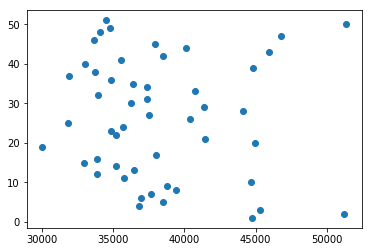

In [280]:
plt.scatter(result.Starting_salary,result.Quality_score)

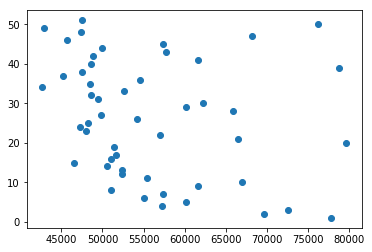

In [281]:
plt.scatter(result.Salary,result.Quality_score)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


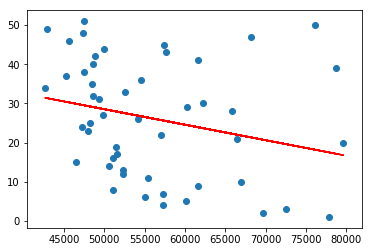

In [277]:
fig, ax = plt.subplots()
fit = np.polyfit(result.Salary, result.Quality_score, deg=1)
ax.plot(result.Salary, fit[0] * result.Salary + fit[1], color='red')
ax.scatter(result.Salary,result.Quality_score)

fig.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

#### Class size vs rank

In [287]:
result1 = pd.merge(df_rank[['State','Overall_score']],
                   df_class_size[['State','Combine_SCC','Combine_DI']],on='State')

In [288]:
result2 = pd.merge(df_rank[['State','Overall_score']],df_class_size[['State','High_SCC','High_DI']],on='State')

In [289]:
#plt.scatter(result2.High_DI,result2.Overall_score)

In [290]:
#plt.scatter(result2.High_SCC,result2.Overall_score)